In [1]:
# Exercise 1a, Page 337 - Numerical Analysis, Burden, Faires

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def RungeKuttaMethod(a, b, m, N, alpha1, alpha2):
    t = []
    w1 = []
    w2 = []
    
    h = (b-a)/N
    
    t.append(a)
    w1.append(alpha1)
    w2.append(alpha2)
    
    for i in range(1, N+1):
        K11 = h*F1(t[i-1], w1[i-1], w2[i-1])
        K12 = h*F2(t[i-1], w1[i-1], w2[i-1])
        
        K21 = h*F1(t[i-1]+h/2, w1[i-1]+K11/2, w2[i-1]+K12/2)
        K22 = h*F2(t[i-1]+h/2, w1[i-1]+K11/2, w2[i-1]+K12/2)
        
        K31 = h*F1(t[i-1]+h/2, w1[i-1]+K21/2, w2[i-1]+K22/2)
        K32 = h*F2(t[i-1]+h/2, w1[i-1]+K21/2, w2[i-1]+K22/2)
        
        K41 = h*F1(t[i-1]+h, w1[i-1]+K31, w2[i-1]+K32)
        K42 = h*F2(t[i-1]+h, w1[i-1]+K31, w2[i-1]+K32)
        
        t.append(a + i*h)
        w1.append(w1[i-1] + (K11+2*K21+2*K31+K41)/6)
        w2.append(w2[i-1] + (K12+2*K22+2*K32+K42)/6)
    
    return t, w1, w2

In [4]:
def F1(t, u1, u2):
    return 3*u1 + 2*u2 - (2*pow(t,2)+1)*math.exp(2*t)

In [5]:
def F2(t, u1, u2):
    return 4*u1 + u2 - (pow(t,2)+2*t-4)*math.exp(2*t) 

In [6]:
def Y1(t):
    return (1/3)*math.exp(5*t) - (1/3)*math.exp(-t) + math.exp(2*t)

In [7]:
def Y2(t):
    return (1/3)*math.exp(5*t) + (2/3)*math.exp(-t) + pow(t,2)*math.exp(2*t)

In [8]:
r, w1, w2 = RungeKuttaMethod(0, 1, 2, 5, 1, 1)

In [9]:
y1 = []
y2 = []
for t in r:
    y1.append(Y1(t))
    y2.append(Y2(t))

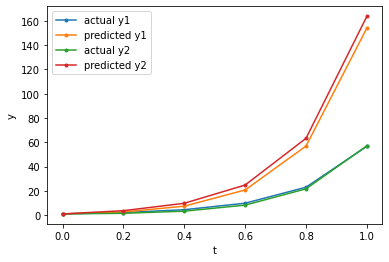

In [10]:
plt.plot(r, y1, marker = '.', label = 'actual y1')
plt.plot(r, w1, marker = '.', label = 'predicted y1')

plt.plot(r, y2, marker = '.', label = 'actual y2')
plt.plot(r, w2, marker = '.', label = 'predicted y2')

plt.xlabel("t")
plt.ylabel("y")
plt.legend()

plt.show()